Notes: packages might need to intall for some codes to run 

In [1]:
#pip install mlxtend

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import os
import string
import glob
from pathlib import Path
import nltk
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from wordcloud import WordCloud,STOPWORDS
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
# import keras
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Embedding,GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB 
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
from lime.lime_text import IndexedString,IndexedCharacters
from lime.lime_base import LimeBase
from sklearn.linear_model import Ridge, lars_path
from lime.lime_text import explanation
from functools import partial
import scipy as sp
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix,roc_curve,auc
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
from lime.lime_text import IndexedString,IndexedCharacters
from lime.lime_base import LimeBase
from sklearn.linear_model import Ridge, lars_path
from lime.lime_text import explanation
from functools import partial
import scipy as sp
from sklearn.utils import check_random_state
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from nltk.classify.scikitlearn import SklearnClassifier
from collections import Counter

### Data cleaning & data preprocessing

In [3]:
fake_news_csv = pd.read_csv('Fake.csv')
real_news_csv = pd.read_csv('True.csv')
stopword_set = nltk.corpus.stopwords.words('english')
dataframes = []

In [4]:
def clean_column(column_name):
   
    lemmatizer = nltk.stem.WordNetLemmatizer()    
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    stemmer = PorterStemmer()
    
    
    word_list=[stemmer.stem(lemmatizer.lemmatize(words.lower())) for words in set(w_tokenizer.tokenize(column_name)) 
               if words.isalpha()
               if words not in string.punctuation
               if words.lower() not in stopword_set]
               
    
    return word_list

In [5]:
def preprocessing_data(df):
    
        df["title_clean"] = df['title'].apply(clean_column)       
        df['text_clean'] = df['text'].apply(clean_column)           
        dataframes.append(df)
        
             
        return df

In [6]:
#codes for entire data:

fake_news_cleaned=preprocessing_data(fake_news_csv)
real_news_cleaned=preprocessing_data(real_news_csv)


#codes for smaller data test:

#fake_news_cleaned_split = fake_news_csv.sample(frac=0.85, random_state=25)
#fake_news_cleaned = preprocessing_data(fake_news_csv.drop(fake_news_cleaned_split.index))  ###fake_news_csv_testing

#real_news_csv_split = real_news_csv.sample(frac=0.85, random_state=25)
#real_news_cleaned = preprocessing_data(real_news_csv.drop(real_news_csv_split.index))   ###real_news_csv_testing


In [7]:
fake_news_cleaned.head(5)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date                                        title_clean  \
0  December 31, 2017  [eve, disturb, send, donald, embarrass, trump,...   
1  December 31, 2017  [collus, investig, start, brag, drunk, russian...   
2  December 30, 2017  [internet, threaten, sheriff, clark, becom, da...   
3  December 29, 2017          [name, trump, websit, even, code, obsess]   
4  December 25, 2017  [christma, franci, donald, call, pope, speech,...   

                                          text_clean  
0  [andrew, holiday, tweet, trump, differ, eve, w...  
1  [bar, drunk, four, script, boy, obtain, campai...  
2  [blood, trump, bag, tough, steeli, secretari, ...  
3  [number, rnc, fourth, day, trump, idea, remov,...  
4  [may, especi, entir, fight, attend, set, war, ...

In [8]:
real_news_cleaned.head(5)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date                                        title_clean  \
0  December 31, 2017   [flip, fiscal, republican, fight, budget, script]   
1  December 29, 2017    [accept, recruit, transgend, pentagon, militari]   
2  December 31, 2017                       [republican, senior, mueller]   
3  December 30, 2017   [fbi, nyt, diplomat, russia, australian, help,...   
4  December 29, 2017   [shipment, want, amazon, postal, servic, charg...   

                                          text_clean  
0  [expans, pay, seek, border, boost, keep, trump...  
1  [workplac, issu, trump, lawyer, specifi, rever...  
2  [may, campaign, offic, ignor, greatli, rival, ...  
3  [four, campaign, set, offic, australian, help,...  
4  [pay, servic, charg, offic, rais, parcel, reve...

In [9]:
fake_news_cleaned['Fake(0) or Real(1)']=0
real_news_cleaned['Fake(0) or Real(1)']=1
news=pd.concat([fake_news_cleaned,real_news_cleaned],ignore_index=True)

<AxesSubplot:>

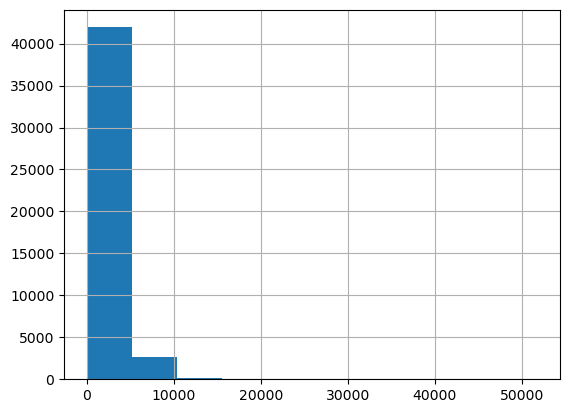

In [10]:
news['text'].str.len().hist()

<AxesSubplot:>

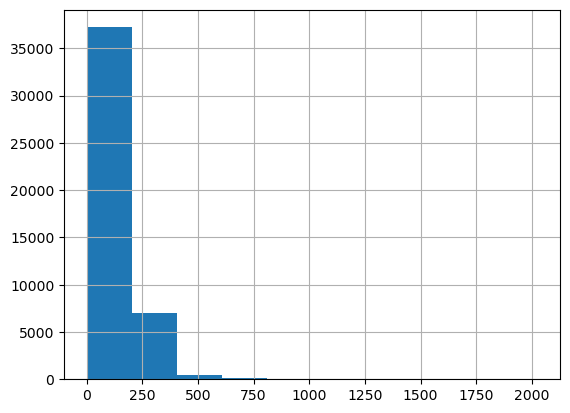

In [11]:
news['text_clean'].str.len().hist()

<AxesSubplot:>

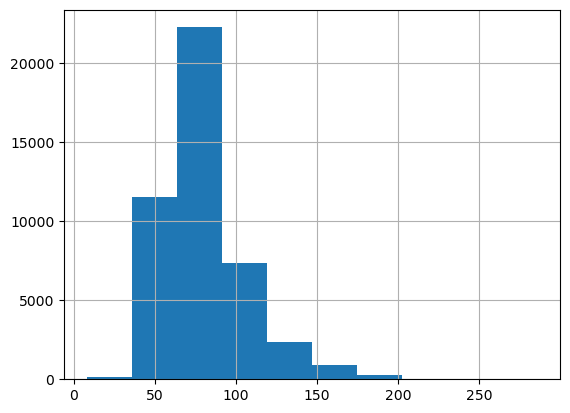

In [12]:
news['title'].str.len().hist()

<AxesSubplot:>

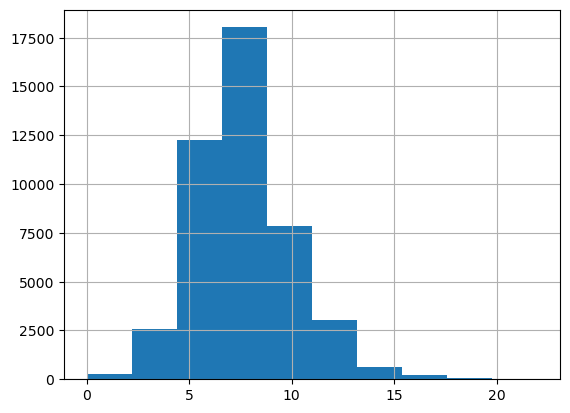

In [13]:
news['title_clean'].str.len().hist()

In [14]:
news.head(5)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date                                        title_clean  \
0  December 31, 2017  [eve, disturb, send, donald, embarrass, trump,...   
1  December 31, 2017  [collus, investig, start, brag, drunk, russian...   
2  December 30, 2017  [internet, threaten, sheriff, clark, becom, da...   
3  December 29, 2017          [name, trump, websit, even, code, obsess]   
4  December 25, 2017  [christma, franci, donald, call, pope, speech,...   

                                          text_clean  Fake(0) or Real(1)  
0  [andrew, holiday, tweet, trump, differ, eve, w...                   0  
1  [bar, drunk, four, script, boy, obtain, campai...                   0  
2  [blood, trump, bag, tough, steeli, secretari, ...                   0  
3  [number, rnc, fourth, day, trump, idea, remov,...                   0  
4  [may, especi, entir, fight, attend, set, war, ...                   0

In [15]:
#checking imbalance
news['Fake(0) or Real(1)'].value_counts()

0    23481
1    21417
Name: Fake(0) or Real(1), dtype: int64

In [16]:
import warnings
warnings.filterwarnings("ignore")

news['text_sents']=np.nan
for i in range(len(news['text'])):
    news['text_sents'][i]=nltk.sent_tokenize(str(news['text'][i]))

In [17]:
news.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date                                        title_clean  \
0  December 31, 2017  [eve, disturb, send, donald, embarrass, trump,...   
1  December 31, 2017  [collus, investig, start, brag, drunk, russian...   
2  December 30, 2017  [internet, threaten, sheriff, clark, becom, da...   
3  December 29, 2017          [name, trump, websit, even, code, obsess]   
4  December 25, 2017  [christma, franci, donald, call, pope, speech,...   

                                          text_clean  Fake(0) or Real(1)  \
0  [andrew, holiday, tweet, trump, differ, eve, w...                   0   
1  [bar, drunk, four, script, boy, obtain, campai...                   0   
2  [blood, trump, bag, tough, steeli, secretari, ...                   0   
3  [number, rnc, fourth, day, trump, idea, remov,...                   0   
4  [may, especi, entir, fight, attend, set, war, ...                   0   

                                          text_sents  
0  [Donald Trump just couldn t wish all Americans...  
1  [House Intelligence Committee Chairman Devin N...  
2  [On Friday, it was revealed that former Milwau...  
3  [On Christmas day, Donald Trump announced that...  
4  [Pope Francis used his annual Christmas Day me...

In [18]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               44898 non-null  object
 1   text                44898 non-null  object
 2   subject             44898 non-null  object
 3   date                44898 non-null  object
 4   title_clean         44898 non-null  object
 5   text_clean          44898 non-null  object
 6   Fake(0) or Real(1)  44898 non-null  int64 
 7   text_sents          44898 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.7+ MB


## Part 1

### Find hot topic in real/fake news and compare

In [19]:
#cited:
#https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
#https://www.linkedin.com/pulse/nlp-a-complete-guide-topic-modeling-latent-dirichlet-sahil-m
import gensim
from gensim.utils import simple_preprocess

In [20]:
def make_bigrams(texts):
    # Build the bigram 
    bigram = gensim.models.Phrases(texts, min_count=5, threshold=100) 
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return [bigram_mod[doc] for doc in texts]

In [21]:
#Form Bigrams for fake news and real news
fake_news_data = fake_news_cleaned['title_clean'].sample(frac=1)
real_news_data = real_news_cleaned['title_clean'].sample(frac=1)
fake_news_bigrams = make_bigrams(fake_news_data)
real_news_bigrams = make_bigrams(real_news_data)

In [22]:
def corpus_dict(data):
    import gensim.corpora as corpora
    # Create Dictionary
    global id2word
    id2word = corpora.Dictionary(data)
    # Create Corpus
    global texts
    texts = data
    # Term Document Frequency
    global corpus
    corpus = [id2word.doc2bow(text) for text in texts]

def build_lda_model(data):
    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    from pprint import pprint
    # Print the Keyword in the 10 topics
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]

In [23]:
def Topic_Coherence(data):
        corpus_dict(data)
        
        # Build LDA model
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
        from gensim.models import CoherenceModel
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=id2word, coherence='c_v')
        coherence_lda=coherence_model_lda.get_coherence()
        print('Coherence Score: ', coherence_lda)

In [24]:
def compute_coherence_values(dictionary,corpus,texts,limit,start=1,step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start,limit,step):
        model= gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=200,
                                           passes=10,
                                           per_word_topics=True,
                                              id2word=id2word)
        
        model_list.append(model)
        
        from gensim.models import CoherenceModel
        coherence_model=CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list,coherence_values

In [25]:
def show_graph(values):
    from matplotlib import pyplot as plt
    limit = 15; start=1; step=1;
    x=range(start,limit,step)
    plt.plot(x,coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence Score")
    plt.legend(("Coherence_values"),loc='best')
    plt.show()

### Find k value (how many number of topics) for fake news data

In [26]:
corpus_dict(fake_news_bigrams)
build_lda_model(fake_news_bigrams)

[(0,
  '0.041*"trump" + 0.022*"gop" + 0.016*"watch" + 0.016*"black" + 0.015*"one" + '
  '0.014*"obama" + 0.012*"lie" + 0.011*"time" + 0.011*"ask" + 0.010*"call"'),
 (1,
  '0.017*"trump" + 0.015*"attack" + 0.014*"take" + 0.011*"cnn" + '
  '0.011*"protest" + 0.010*"america" + 0.009*"host" + 0.009*"hilari" + '
  '0.009*"polic" + 0.008*"gun"'),
 (2,
  '0.038*"hillari" + 0.019*"democrat" + 0.018*"obama" + 0.017*"muslim" + '
  '0.016*"white" + 0.014*"clinton" + 0.014*"get" + 0.013*"american" + '
  '0.012*"vote" + 0.012*"republican"'),
 (3,
  '0.071*"trump" + 0.020*"donald" + 0.017*"make" + 0.016*"presid" + '
  '0.012*"support" + 0.012*"want" + 0.011*"campaign" + 0.011*"give" + '
  '0.009*"go" + 0.009*"tri"'),
 (4,
  '0.031*"trump" + 0.017*"news" + 0.014*"fox" + 0.014*"man" + 0.013*"new" + '
  '0.013*"senat" + 0.012*"tweet" + 0.010*"respons" + 0.010*"berni" + '
  '0.009*"clinton"')]


In [27]:
Topic_Coherence(fake_news_bigrams)

Coherence Score:  0.17679652067793433


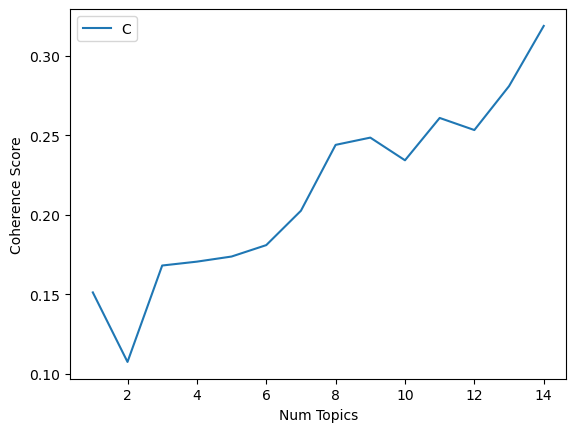

In [28]:
model_list,coherence_values=compute_coherence_values(dictionary=id2word,
                                                     corpus=corpus,
                                                     texts=fake_news_bigrams,
                                                     limit=15,start=1,step=1)
show_graph(coherence_values)


In [29]:
coherence_values

[0.15116861877037574,
 0.1074760643950739,
 0.16807709740058807,
 0.17050895280980669,
 0.17372365925297228,
 0.18089853869573072,
 0.20251665693559265,
 0.2439175062356847,
 0.24847693589993838,
 0.2342230716805828,
 0.26083935644210343,
 0.25324122611515887,
 0.28084282991252224,
 0.3186864625710699]

In [30]:
fake_news_num_topics=coherence_values.index(max(coherence_values))+1
fake_news_num_topics

14

### find k value (how many number of topics) for real news data

In [31]:
corpus_dict(real_news_bigrams)
build_lda_model(real_news_bigrams)

[(0,
  '0.036*"court" + 0.032*"new" + 0.019*"vote" + 0.016*"sourc" + 0.015*"top" + '
  '0.013*"law" + 0.013*"rule" + 0.012*"suprem" + 0.011*"right" + 0.011*"make"'),
 (1,
  '0.043*"say" + 0.035*"trump" + 0.028*"russia" + 0.020*"call" + 0.017*"deal" '
  '+ 0.016*"pm" + 0.015*"offici" + 0.015*"eu" + 0.014*"presid" + 0.013*"urg"'),
 (2,
  '0.065*"trump" + 0.013*"move" + 0.013*"protest" + 0.013*"congress" + '
  '0.013*"clinton" + 0.012*"order" + 0.011*"case" + 0.011*"trade" + '
  '0.011*"governor" + 0.010*"border"'),
 (3,
  '0.048*"trump" + 0.045*"hous" + 0.028*"say" + 0.026*"republican" + '
  '0.025*"white" + 0.018*"democrat" + 0.016*"tax" + 0.015*"chief" + '
  '0.013*"minist" + 0.013*"bill"'),
 (4,
  '0.030*"senat" + 0.028*"north" + 0.023*"say" + 0.022*"elect" + 0.017*"korea" '
  '+ 0.017*"meet" + 0.015*"may" + 0.015*"kill" + 0.014*"obama" + '
  '0.012*"polic"')]


In [32]:
Topic_Coherence(real_news_bigrams)

Coherence Score:  0.2472075654510531


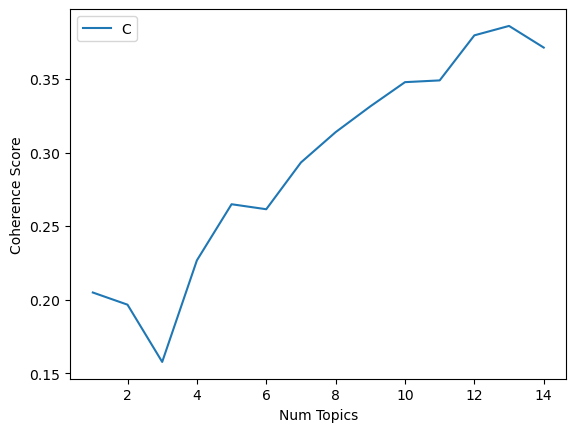

In [33]:
model_list,coherence_values=compute_coherence_values(dictionary=id2word,
                                                     corpus=corpus,
                                                     texts=real_news_bigrams,
                                                     limit=15,start=1,step=1)
show_graph(coherence_values)


In [34]:
coherence_values

[0.20483812491621367,
 0.19656559600841061,
 0.1576367062149123,
 0.22668720483863608,
 0.2648634644647133,
 0.2614655077743853,
 0.29325701664131554,
 0.31387812750784605,
 0.33140342612248835,
 0.34787887269719836,
 0.34906681999449235,
 0.37970452055030185,
 0.3861128676891526,
 0.371391946049049]

In [35]:
real_news_num_topics=coherence_values.index(max(coherence_values))+1
real_news_num_topics

13

### Hot subjects in fake news:

In [36]:
fake_news_data1 = fake_news_cleaned['title_clean']

<AxesSubplot:xlabel='count', ylabel='subject'>

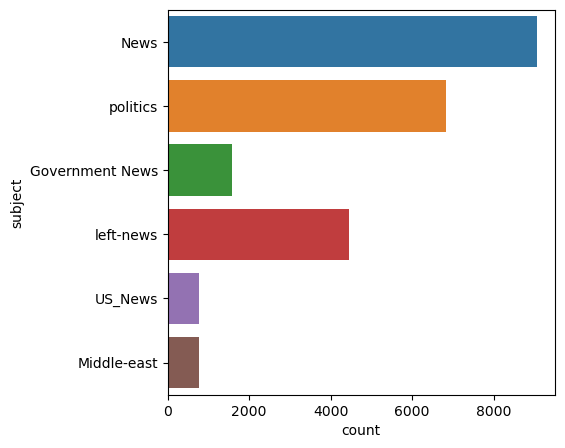

In [37]:
#cited: 
#https://www.kaggle.com/code/shiblinomani/fake-news-detection-tokenization-lstm
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
sns.countplot(y="subject", data = fake_news_cleaned)

### Hot subjects in the real news:

In [38]:
real_news_data1 = real_news_cleaned['title_clean']

<AxesSubplot:xlabel='count', ylabel='subject'>

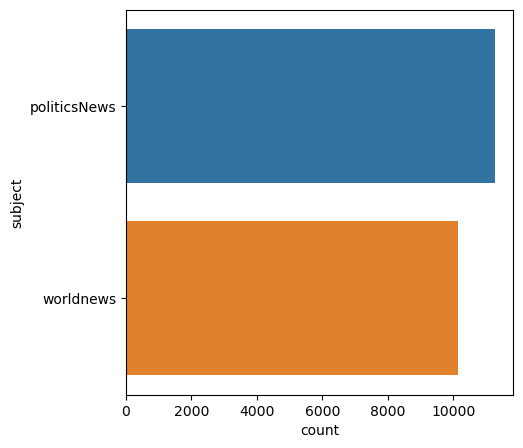

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(y="subject", data = real_news_cleaned)

### What are the hot topics in the fake news? 

In [40]:
import nltk
def words(col_name):
    word_list=[]
    for x in list(col_name):
        for w in x:
            word_list.append(w)
    return word_list
            
fake_news_words = words(fake_news_data1)
real_news_words = words(real_news_data1)

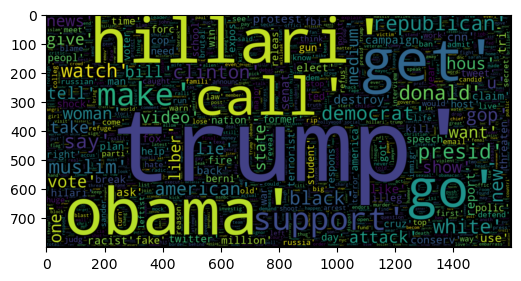

In [41]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(6,6))
wc = WordCloud(max_words =2000, width = 1600, height =800, stopwords = stopword_set).generate(str(fake_news_words))
plt.imshow(wc, interpolation='bilinear')

In [42]:
#cited: 
#https://github.com/maha-prathamesh/Topic-Modeling-on-News-Articles/blob/main/Topic_Modeling_Assignment_Spacy_Git.ipynb

import gensim.corpora as corpora
#Create Corpus using Bag of words
fake_news_words1 = corpora.Dictionary(fake_news_data1)
fake_news_corpus = [fake_news_words1.doc2bow(doc) for doc in fake_news_data1]

In [43]:
#LDA Modeling
from gensim.models.ldamodel import LdaModel

fake_news_lda_model = LdaModel(corpus=fake_news_corpus,
                                           num_topics=fake_news_num_topics, 
                                           random_state=100,
                                           chunksize=200,
                                           passes=10,
                                           per_word_topics=True,
                                              id2word=fake_news_words1)
print(fake_news_lda_model.print_topics())

[(0, '0.125*"go" + 0.091*"polit" + 0.050*"day" + 0.034*"trump" + 0.033*"murder" + 0.032*"dead" + 0.029*"us" + 0.029*"respons" + 0.027*"twitter" + 0.023*"tweet"'), (1, '0.108*"protest" + 0.063*"claim" + 0.058*"help" + 0.053*"forc" + 0.048*"presidenti" + 0.041*"senat" + 0.032*"candid" + 0.031*"control" + 0.027*"creat" + 0.025*"way"'), (2, '0.052*"sunday" + 0.052*"make" + 0.046*"show" + 0.045*"support" + 0.040*"vote" + 0.034*"student" + 0.033*"episod" + 0.032*"woman" + 0.028*"school" + 0.028*"old"'), (3, '0.091*"medium" + 0.048*"want" + 0.044*"illeg" + 0.041*"elect" + 0.031*"hack" + 0.030*"cnn" + 0.027*"open" + 0.026*"russian" + 0.026*"trump" + 0.024*"alien"'), (4, '0.081*"black" + 0.067*"white" + 0.064*"war" + 0.058*"fake" + 0.052*"news" + 0.046*"hous" + 0.041*"report" + 0.033*"life" + 0.029*"expos" + 0.027*"race"'), (5, '0.098*"muslim" + 0.079*"presid" + 0.062*"watch" + 0.052*"trump" + 0.044*"million" + 0.033*"like" + 0.029*"caught" + 0.026*"question" + 0.025*"parti" + 0.025*"ban"'), (6

In [44]:
#pip install pyldavis

In [45]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import warnings
warnings.filterwarnings("ignore")

pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
pyLDAvis_lda_fake_news = gensimvis.prepare(fake_news_lda_model, 
                                 fake_news_corpus, 
                                 fake_news_words1)

/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in fav

In [46]:
pyLDAvis_lda_fake_news

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11    -0.101028 -0.088459       1        1  9.318502
8      0.052010  0.141877       2        1  8.383255
2     -0.105226 -0.060923       3        1  8.355496
12    -0.149144 -0.042195       4        1  8.056701
13    -0.047724 -0.005205       5        1  8.041698
9      0.301394 -0.335678       6        1  7.490504
3     -0.074872 -0.034663       7        1  7.478637
7      0.208057  0.230645       8        1  7.289271
4     -0.042197  0.000060       9        1  7.217178
5     -0.118851 -0.019090      10        1  7.175432
6     -0.080506  0.017328      11        1  6.594895
10     0.136800  0.098929      12        1  5.403773
0     -0.075357  0.014502      13        1  4.879353
1      0.096643  0.082871      14        1  4.315307, topic_info=           Term         Freq        Total Category  logprob  loglift
702     hillari  2175.000000  2175.000000  Default  30.0000  30.0000
85            u  2048.000000  2048.000000  Default  29.0000  29.0000
335       obama  1883.000000  1883.000000  Default  28.0000  28.0000
2063       room  1556.000000  1556.000000  Default  27.0000  27.0000
8291     boiler  1477.000000  1477.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4734         mi    95.397162    96.859352  Topic14  -4.4603   3.1278
671   brilliant    93.530014    94.992203  Topic14  -4.4801   3.1275
1428    alreadi    91.015436    92.477627  Topic14  -4.5073   3.1271
462       marco    87.460660    88.922850  Topic14  -4.5472   3.1264
3460   introduc    75.786771    77.248962  Topic14  -4.6904   3.1239

[470 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
358       4  0.988900  access
122       7  0.991352   accus
55        1  0.992643     act
64        3  0.994169      ad
254      12  0.991463   admit
...     ...       ...     ...
1933     14  0.986763  worker
295      12  0.996780   world
173      11  0.996508   would
164       2  0.995805    year
6068      3  0.993217      yr

[445 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 9, 3, 13, 14, 10, 4, 8, 5, 6, 7, 11, 1, 2])

### What are the hot topics in the real news?


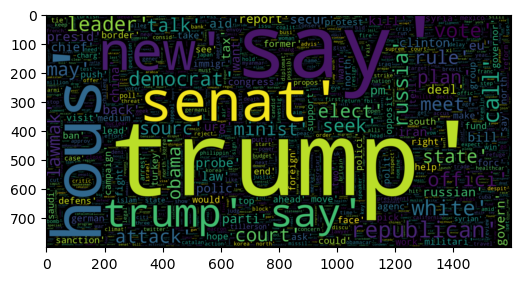

In [47]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(6,6))
wc = WordCloud(max_words =2000, width = 1600, height =800, stopwords = stopword_set).generate(str(real_news_words))
plt.imshow(wc, interpolation='bilinear')

In [48]:
#Create Corpus using Bag of words
real_news_words1 = corpora.Dictionary(real_news_data1)
real_news_corpus = [real_news_words1.doc2bow(doc) for doc in real_news_data1]

#LDA Modeling
from gensim.models.ldamodel import LdaModel

real_news_lda_model = LdaModel(corpus=real_news_corpus, id2word=real_news_words1, num_topics=real_news_num_topics, random_state=2, update_every=1,\
                                 passes=10, alpha='auto')
print(real_news_lda_model.print_topics())

[(0, '0.059*"state" + 0.054*"kill" + 0.043*"call" + 0.040*"attack" + 0.030*"islam" + 0.029*"russian" + 0.022*"independ" + 0.022*"clinton" + 0.022*"report" + 0.021*"russia"'), (1, '0.080*"north" + 0.061*"korea" + 0.039*"china" + 0.037*"polic" + 0.030*"say" + 0.028*"south" + 0.023*"saudi" + 0.020*"sanction" + 0.018*"foreign" + 0.017*"korean"'), (2, '0.069*"iran" + 0.033*"nuclear" + 0.029*"deal" + 0.029*"milit" + 0.028*"trump" + 0.027*"see" + 0.025*"fire" + 0.021*"tie" + 0.020*"protest" + 0.018*"pressur"'), (3, '0.042*"turkish" + 0.035*"make" + 0.030*"close" + 0.024*"chines" + 0.023*"activist" + 0.022*"east" + 0.021*"million" + 0.020*"suspend" + 0.019*"journalist" + 0.016*"servic"'), (4, '0.071*"leader" + 0.061*"presid" + 0.034*"trump" + 0.034*"arrest" + 0.027*"former" + 0.021*"campaign" + 0.020*"first" + 0.018*"get" + 0.018*"new" + 0.017*"order"'), (5, '0.063*"vote" + 0.055*"elect" + 0.051*"parti" + 0.043*"senat" + 0.032*"trump" + 0.031*"republican" + 0.028*"back" + 0.024*"democrat" + 0.

In [49]:
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
pyLDAvis_lda_real_news = gensimvis.prepare(real_news_lda_model, 
                                 real_news_corpus, 
                                 real_news_words1)

In [50]:
pyLDAvis_lda_real_news

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.267261  0.081852       1        1  12.206308
1     -0.180110  0.023598       2        1  10.486227
12     0.061969  0.151254       3        1   9.962896
5      0.132064  0.184851       4        1   9.962112
0     -0.152309 -0.268990       5        1   9.241457
4      0.040421 -0.008138       6        1   7.334229
8      0.133040 -0.093575       7        1   7.011529
11    -0.163701  0.091015       8        1   6.971299
10    -0.015062 -0.077435       9        1   6.786466
6      0.144257  0.083688      10        1   5.565918
2      0.010764  0.106825      11        1   5.513422
7      0.131500 -0.159675      12        1   4.936210
3      0.124428 -0.115269      13        1   4.021926, topic_info=         Term         Freq        Total Category  logprob  loglift
32        say  3233.000000  3233.000000  Default  30.0000  30.0000
379     north  1211.000000  1211.000000  Default  29.0000  29.0000
142      hous   952.000000   952.000000  Default  28.0000  28.0000
82      court   727.000000   727.000000  Default  27.0000  27.0000
117      vote   910.000000   910.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1168   promis    43.784564    44.792275  Topic13  -4.8893   3.1907
1736  illinoi    41.634551    42.642260  Topic13  -4.9396   3.1895
710   million   124.189364   192.923854  Topic13  -3.8467   2.7729
599    propos    72.700382   157.689175  Topic13  -4.3822   2.4391
328     delay    50.066706   107.476809  Topic13  -4.7552   2.4495

[528 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1482     11  0.986020      abe
950      12  0.982533     abus
6         3  0.987659   accept
515       4  0.993521    accus
908       2  0.980274   action
...     ...       ...      ...
1004     12  0.988797   worker
1364      2  0.991938       xi
123       9  0.992136     year
4260      7  0.986537  zealand
5541      6  0.988904  zimbabw

[688 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 13, 6, 1, 5, 9, 12, 11, 7, 3, 8, 4])

### The hot topics in the fake news but not in the real news

In [51]:
fake_news_words = words(fake_news_data1)
real_news_words = words(real_news_data1)
compare_words= [w for w in fake_news_words if w not in real_news_words]

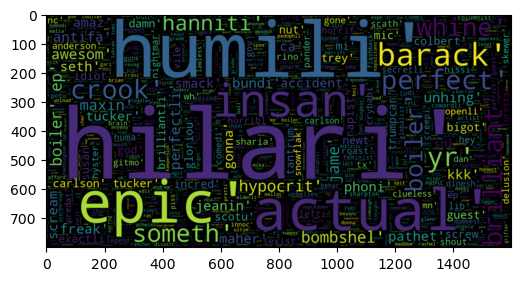

In [52]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(6,6))
wc = WordCloud(max_words =2000, width = 1600, height =800, stopwords = stopword_set).generate(str(compare_words))
plt.imshow(wc, interpolation='bilinear')

## Part 2

### Does fake news has more negative connotation words than real news?

In [53]:
# pip install vaderSentiment

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [55]:
sa=SentimentIntensityAnalyzer()

fake_news_sa = words(fake_news_cleaned['title_clean'])
real_news_sa = words(real_news_cleaned['title_clean'])

In [56]:
#sentiment score for fake news
#this line of code need to run a long time so commented out
#but keep the output for the general idea

#sa.polarity_scores(text=str(fake_news_sa))

#output:{'neg': 0.202, 'neu': 0.704, 'pos': 0.094, 'compound': -1.0}

In [57]:
#this line of code need to run a long time so commented out
#but keep the output for the general idea
#sentiment score for real news

#sa.polarity_scores(text=str(real_news_sa))

#output: {'neg': 0.139, 'neu': 0.79, 'pos': 0.07, 'compound': -1.0}

In [58]:
#the fake_news_words and real_news words are from cleaned data
fake_news_sa_fdist = nltk.FreqDist(w.lower() for w in fake_news_words)
real_news_sa_fdist = nltk.FreqDist(w.lower() for w in real_news_words)

#since test all words in the dataset will cause a long time
#we will test the first 800 most common words in two datasets
fake_news_sa = [w[0] for w in fake_news_sa_fdist.most_common(800)]
real_news_sa = [w[0] for w in real_news_sa_fdist.most_common(800)]

In [59]:
sa.polarity_scores(text=str(fake_news_sa))

{'neg': 0.234, 'neu': 0.652, 'pos': 0.114, 'compound': -0.999}

In [60]:
sa.polarity_scores(text=str(real_news_sa))

{'neg': 0.165, 'neu': 0.758, 'pos': 0.077, 'compound': -0.9974}

In [61]:
#As a result,
#fake news has higher neg score and lower pos score
#real news has higher neu score

## Part 3

### How can we classify fake/real news?
#### add sentimental analysis and result modeling to the dataset then build classification model

In [62]:
#random shuffle the news dataset
news = news.sample(frac=1).reset_index(drop=True)

In [63]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               44898 non-null  object
 1   text                44898 non-null  object
 2   subject             44898 non-null  object
 3   date                44898 non-null  object
 4   title_clean         44898 non-null  object
 5   text_clean          44898 non-null  object
 6   Fake(0) or Real(1)  44898 non-null  int64 
 7   text_sents          44898 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.7+ MB


In [64]:
news1 = news.pop('Fake(0) or Real(1)') # remove column b and store it in df1
news['Fake(0) or Real(1)']=news1 # add b series as a 'new' column.
news.tail()

title  \
44893  U.S. Intel Finds And Maps Out ISIS Propaganda/...   
44894  Obama urges Congress to give plan to close Gua...   
44895  House, Senate letters back Asia military fundi...   
44896  U.S. Tillerson assures Washington's only goal ...   
44897  Thai government takes action against monk over...   

                                                    text          subject  \
44893  Talk about a flawed strategy! Obama is doing e...  Government News   
44894  WASHINGTON (Reuters) - U.S. President Barack O...     politicsNews   
44895  WASHINGTON (Reuters) - A bipartisan group of U...     politicsNews   
44896  MOSCOW (Reuters) - U.S. Secretary of State Rex...        worldnews   
44897  BANGKOK (Reuters) - The Thai government said o...        worldnews   

                      date                                        title_clean  \
44893         Dec 15, 2015  [map, target, isi, center, find, intel, airstrik]   
44894   February 23, 2016   [plan, fair, close, guantanamo, give, hear, ur...   
44895       March 1, 2017   [senat, letter, fund, back, asia, propos, mili...   
44896    October 12, 2017   [lavrov, tillerson, goal, syria, ta, assur, ci...   
44897  September 21, 2017            [thai, view, take, govern, monk, action]   

                                              text_clean  \
44893  [macabr, number, blood, campaign, contain, app...   
44894  [guantanamo, tuesday, give, prison, succe, wan...   
44895  [chair, four, seven, servic, vow, boost, jim, ...   
44896  [rex, foreign, fight, reduc, accus, convers, l...   
44897  [social, ashin, issu, disrespect, bangkok, bas...   

                                              text_sents  Fake(0) or Real(1)  
44893  [Talk about a flawed strategy!, Obama is doing...                   0  
44894  [WASHINGTON (Reuters) - U.S. President Barack ...                   1  
44895  [WASHINGTON (Reuters) - A bipartisan group of ...                   1  
44896  [MOSCOW (Reuters) - U.S. Secretary of State Re...                   1  
44897  [BANGKOK (Reuters) - The Thai government said ...                   1

In [65]:
import math

In [66]:
def _create_frequency_matrix(sentences):
    frequency_matrix = {}
    ps = PorterStemmer()

    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stopword_set:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table
    return frequency_matrix

In [67]:
def _create_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence

        tf_matrix[sent] = tf_table

    return tf_matrix

In [68]:
def _create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

                
    return word_per_doc_table

In [69]:
def _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

In [70]:
def _create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

In [71]:
def _score_sentences(tf_idf_matrix) -> dict:
    """
    score a sentence by its word's TF
    Basic algorithm: adding the TF frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """

    sentenceValue = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        try:
            sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence
        
        except ZeroDivisionError:
            sentenceValue[sent] = 0

    return sentenceValue

In [72]:
def _find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original summary_text
    try:
        average = (sumValues / len(sentenceValue))
        
    except ZeroDivisionError:
        average = 0
    
    return average

In [73]:
news['TF-IDF score']=np.nan

for i in range(len(news['text'])):
    total_documents=len(news['text_sents'][i])
    freq_matrix = _create_frequency_matrix(news['text_sents'][i])
    tf_matrix = _create_tf_matrix(freq_matrix)
    count_doc_per_words = _create_documents_per_words(freq_matrix)
    idf_matrix = _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
    tf_idf_matrix = _create_tf_idf_matrix(tf_matrix, idf_matrix)
    sentence_scores = _score_sentences(tf_idf_matrix)
    threshold = _find_average_score(sentence_scores)
    news['TF-IDF score'][i]=float(threshold)

In [74]:
news['TF-IDF score'].head(10)

0    0.000000
1    0.120590
2    0.087639
3    0.027385
4    0.086238
5    0.065192
6    0.038679
7    0.131028
8    0.067221
9    0.000000
Name: TF-IDF score, dtype: float64

In [75]:
#random shuffle the news dataset
import warnings
warnings.filterwarnings('ignore')

news_with_score = news.sample(frac=1).reset_index(drop=True)

In [76]:
list_text = news_with_score['title'].tolist()
neg_score=[]
pos_score=[]
neu_score=[]

for i in range(len(list_text)):
    neg_score.append(sa.polarity_scores(list_text[i])['neg'])
    pos_score.append(sa.polarity_scores(list_text[i])['pos'])
    neu_score.append(sa.polarity_scores(list_text[i])['neu'])

news_with_score["polarity_neg_scores"]=neg_score
news_with_score["polarity_pos_scores"]=pos_score
news_with_score["polarity_neu_scores"]=neu_score

In [77]:
news_with_score.head()

title  \
0  Turkey, Iran, Iraq consider counter-measures o...   
1  Schiff says accepted White House invitation to...   
2   Democratic Senator Joins #THERESISTANCE: Says...   
3  Chile police block boxer Mike Tyson from enter...   
4  Philippine lawmakers reject last left-wing cab...   

                                                text       subject  \
0  ANKARA (Reuters) - Turkey, Iran and Iraq have ...     worldnews   
1  WASHINGTON (Reuters) - The top Democrat on the...  politicsNews   
2  We all remember when Justice Antonin Scalia di...          News   
3  SANTIAGO (Reuters) - Chilean police prevented ...     worldnews   
4  MANILA (Reuters) - Philippine lawmakers on Wed...     worldnews   

                  date                                        title_clean  \
0  September 21, 2017                 [iraq, consid, kurdish, referendum]   
1      March 30, 2017   [accept, intellig, hous, review, invit, schiff...   
2     February 1, 2017  [stole, join, trump, scotu, seat, democrat, se...   
3    November 9, 2017   [polic, block, tyson, boxer, chile, countri, m...   
4   September 6, 2017   [minist, reject, last, cabinet, philippin, law...   

                                          text_clean  \
0  [dislodg, foreign, neighbor, contain, region, ...   
1  [note, deliv, top, review, democrat, invit, kn...   
2  [fundament, jeff, effect, obstruct, oppos, tru...   
3  [sentenc, seek, call, attend, drop, medium, sp...   
4  [reform, may, promot, deal, philippin, bid, no...   

                                          text_sents  Fake(0) or Real(1)  \
0  [ANKARA (Reuters) - Turkey, Iran and Iraq have...                   1   
1  [WASHINGTON (Reuters) - The top Democrat on th...                   1   
2  [We all remember when Justice Antonin Scalia d...                   0   
3  [SANTIAGO (Reuters) - Chilean police prevented...                   1   
4  [MANILA (Reuters) - Philippine lawmakers on We...                   1   

   TF-IDF score  polarity_neg_scores  polarity_pos_scores  polarity_neu_scores  
0      0.041342                0.000                0.000                1.000  
1      0.007047                0.000                0.426                0.574  
2      0.071910                0.000                0.000                1.000  
3      0.033904                0.266                0.000                0.734  
4      0.056680                0.310                0.000                0.690

In [78]:
news_with_score['compare word yes(1) or (no)']=np.nan
for j in range(len(news_with_score['title_clean'])):
    for i in news_with_score['title_clean'][j]:
        #compare_words created in topic modeling question
        if i in compare_words:
            news_with_score['compare word yes(1) or (no)'][j]=int(1)
        else:
            news_with_score['compare word yes(1) or (no)'][j]=(0)

In [79]:
news_with_score['compare word yes(1) or (no)'].unique()

array([ 0.,  1., nan])

In [80]:
news_with_score.isna().sum()

title                           0
text                            0
subject                         0
date                            0
title_clean                     0
text_clean                      0
text_sents                      0
Fake(0) or Real(1)              0
TF-IDF score                    0
polarity_neg_scores             0
polarity_pos_scores             0
polarity_neu_scores             0
compare word yes(1) or (no)    20
dtype: int64

In [81]:
news_with_score.dropna(subset=['compare word yes(1) or (no)'], inplace=True)

In [82]:
news_with_score1 = news_with_score.pop('Fake(0) or Real(1)') # remove column b and store it in df1
news_with_score['Fake(0) or Real(1)']=news_with_score1 # add b series as a 'new' column.

In [83]:
news_with_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44878 entries, 0 to 44897
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        44878 non-null  object 
 1   text                         44878 non-null  object 
 2   subject                      44878 non-null  object 
 3   date                         44878 non-null  object 
 4   title_clean                  44878 non-null  object 
 5   text_clean                   44878 non-null  object 
 6   text_sents                   44878 non-null  object 
 7   TF-IDF score                 44878 non-null  float64
 8   polarity_neg_scores          44878 non-null  float64
 9   polarity_pos_scores          44878 non-null  float64
 10  polarity_neu_scores          44878 non-null  float64
 11  compare word yes(1) or (no)  44878 non-null  float64
 12  Fake(0) or Real(1)           44878 non-null  int64  
dtypes: float64(5), i

In [84]:
X = news_with_score.drop(['title','text','subject','date','title_clean',
                           'text_clean','text_sents','Fake(0) or Real(1)'], axis = 1)
y=news_with_score['Fake(0) or Real(1)']

In [85]:
from sklearn.model_selection import train_test_split

#80% of the data is used for training and 20% is used for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [86]:
x_train

TF-IDF score  polarity_neg_scores  polarity_pos_scores  \
6637       0.046032                0.197                0.122   
20747      0.081390                0.596                0.000   
15692      0.107928                0.151                0.000   
33306      0.078458                0.000                0.160   
16554      0.054570                0.000                0.000   
...             ...                  ...                  ...   
40078      0.072110                0.169                0.193   
28032      0.090958                0.403                0.000   
29215      0.081388                0.000                0.133   
40080      0.053698                0.180                0.000   
17681      0.060293                0.000                0.143   

       polarity_neu_scores  compare word yes(1) or (no)  
6637                 0.680                          0.0  
20747                0.404                          1.0  
15692                0.849                          0.0  
33306                0.840                          0.0  
16554                1.000                          0.0  
...                    ...                          ...  
40078                0.639                          0.0  
28032                0.597                          0.0  
29215                0.867                          0.0  
40080                0.820                          0.0  
17681                0.857                          0.0  

[35902 rows x 5 columns]

In [87]:
y_train

6637     1
20747    0
15692    1
33306    1
16554    1
        ..
40078    0
28032    1
29215    0
40080    0
17681    1
Name: Fake(0) or Real(1), Length: 35902, dtype: int64

### Perform standardization

In [88]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train.ravel())

KNeighborsClassifier()

Performing 5-Fold Cross Validation

In [90]:
k = 5
kf = KFold(n_splits=k)

result = cross_val_score(knn, x_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7120492176235725


Performing Stratified 10-Fold Cross Validation

In [91]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)
result = cross_val_score(knn, x_train, y_train.ravel(), cv = skf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7140270205070088


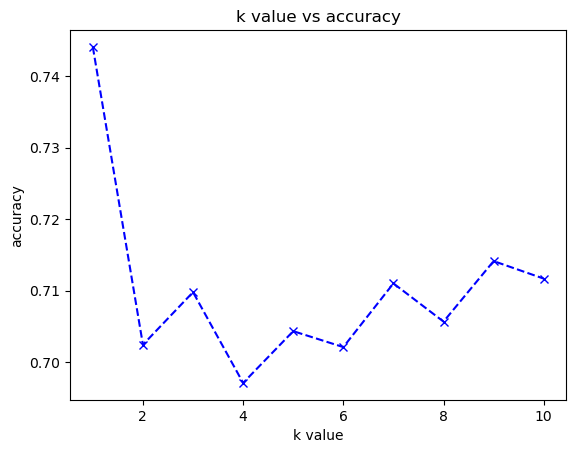

In [92]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
accuracy = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train.ravel())
    y_pred = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred.ravel()))
plt.plot(list(range(1,11)), accuracy, color='blue', linestyle='dashed', marker='x')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('k value vs accuracy')
plt.show()

In [93]:
#k = accuracy.index(max(accuracy))+1
#since the k=1 can not work, 
#so we can select 5 base on the graph
k = 5

## Fit the models to training data

### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

#logistic regression model
logistic_model = LogisticRegression()

logistic_model.fit(x_train, y_train)

LogisticRegression()

### Decision Tree Model

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

### Random Forest Model

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=k, criterion='gini',random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=1)

### KNN Model

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier()

### Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train.ravel())

GaussianNB()

### Perform n fold cross validation

In [99]:
#list
cross_val_list=[]

#import library

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
k = k
kf = KFold(n_splits=k)

In [100]:
#Logitic regression
lr_result = cross_val_score(logistic_model, x_train, y_train.ravel(), cv = kf, scoring='accuracy')
lr_accuracy=lr_result.mean()
print(f' Avg accuracy:{lr_accuracy}')


 Avg accuracy:0.6897943582938418


In [101]:
#Decision Tree
dt_result = cross_val_score(dt, x_train, y_train.ravel(), cv = kf, scoring='accuracy')
dt_accuracy=dt_result.mean()
print(f' Avg accuracy:{dt_accuracy}')

 Avg accuracy:0.7256420746639131


In [102]:
#Random Forest
rf_result = cross_val_score(rf, x_train, y_train, cv = kf, scoring='accuracy')
rf_accuracy=rf_result.mean()
print(f' Avg accuracy:{rf_accuracy}')

 Avg accuracy:0.7361150575702904


In [103]:
#KNN
knn_result = cross_val_score(knn, x_train, y_train, cv = kf, scoring='accuracy')
knn_accuracy=rf_result.mean()
print(f' Avg accuracy:{knn_accuracy}')

 Avg accuracy:0.7361150575702904


In [104]:
#Naive Bayes
gnb_result = cross_val_score(gnb, x_train, y_train.ravel(), cv = kf, scoring='accuracy')
gnb_accuracy=gnb_result.mean()
print(f' Avg accuracy:{gnb_accuracy}')

 Avg accuracy:0.5428387546989328


In [105]:
cross_val_list.append(lr_accuracy)
cross_val_list.append(dt_accuracy)
cross_val_list.append(rf_accuracy)
cross_val_list.append(knn_accuracy)
cross_val_list.append(gnb_accuracy)

cross_val_list

[0.6897943582938418,
 0.7256420746639131,
 0.7361150575702904,
 0.7361150575702904,
 0.5428387546989328]

### Results

In [106]:
#logistic regression predictions
y_pred_lr = logistic_model.predict(x_test)

#decision tree predictions
y_pred_dt = dt.predict(x_test)

#random forest predictions
y_pred_rf = rf.predict(x_test)

#knn predictions
y_pred_knn = knn.predict(x_test)

#Naive Bayes predictions
y_pred_gnb = gnb.predict(x_test)

### Classification reports

In [107]:
#logistic regression classification report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_lr)

array([[3042, 1643],
       [1244, 3047]])

In [108]:
from sklearn.metrics import classification_report
lr_report=classification_report(y_test, y_pred_lr)
print(lr_report)

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      4685
           1       0.65      0.71      0.68      4291

    accuracy                           0.68      8976
   macro avg       0.68      0.68      0.68      8976
weighted avg       0.68      0.68      0.68      8976



In [109]:
#decision tree classification report
dt_report=classification_report(y_test, y_pred_dt)
print(dt_report)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      4685
           1       0.75      0.70      0.72      4291

    accuracy                           0.74      8976
   macro avg       0.74      0.74      0.74      8976
weighted avg       0.74      0.74      0.74      8976



In [110]:
#random forest classification report
rf_report=classification_report(y_test, y_pred_rf)
print(rf_report)

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      4685
           1       0.75      0.72      0.74      4291

    accuracy                           0.75      8976
   macro avg       0.75      0.75      0.75      8976
weighted avg       0.75      0.75      0.75      8976



In [111]:
#knn classification report
knn_report=classification_report(y_test, y_pred_knn)
print(knn_report)

              precision    recall  f1-score   support

           0       0.73      0.70      0.71      4685
           1       0.68      0.71      0.70      4291

    accuracy                           0.70      8976
   macro avg       0.70      0.70      0.70      8976
weighted avg       0.71      0.70      0.70      8976



In [112]:
#naive bayes classification report
gnb_report=classification_report(y_test, y_pred_gnb)
print(gnb_report)

              precision    recall  f1-score   support

           0       1.00      0.12      0.22      4685
           1       0.51      1.00      0.68      4291

    accuracy                           0.54      8976
   macro avg       0.75      0.56      0.45      8976
weighted avg       0.77      0.54      0.44      8976



### Results 

In [113]:
x_label=['LOG-R', 'DT', 'RF','KNN','GNB']
accuracy  = []
precision = []
recall    = []
f1        = []

In [114]:
lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
dt_report=classification_report(y_test, y_pred_dt,output_dict=True)
rf_report=classification_report(y_test, y_pred_rf,output_dict=True)
knn_report=classification_report(y_test, y_pred_knn,output_dict=True)
gnb_report=classification_report(y_test, y_pred_gnb,output_dict=True)

def list_append(report):
    accuracy.append(report['accuracy'])
    precision.append(report['macro avg']['precision'])
    recall.append(report['macro avg']['recall'])
    f1.append(report['macro avg']['f1-score'])

In [115]:
list_append(lr_report)
list_append(dt_report)
list_append(rf_report)
list_append(knn_report)
list_append(gnb_report)

In [116]:
results = {'Model':['LOG-R', 'DT', 'RF','KNN','GNB'],
       'CV Accuracy':cross_val_list,
       'Accuracy':accuracy,
          'Precision':precision,
          'Recall':recall,
          'F1':f1}
results_data = pd.DataFrame(results)
results_data

Model  CV Accuracy  Accuracy  Precision    Recall        F1
0  LOG-R     0.689794  0.678365   0.679716  0.679699  0.678364
1     DT     0.725642  0.742536   0.742954  0.740662  0.741071
2     RF     0.736115  0.754456   0.754436  0.753071  0.753427
3    KNN     0.736115  0.704323   0.704207  0.704595  0.704142
4    GNB     0.542839  0.541555   0.754361  0.560823  0.446545

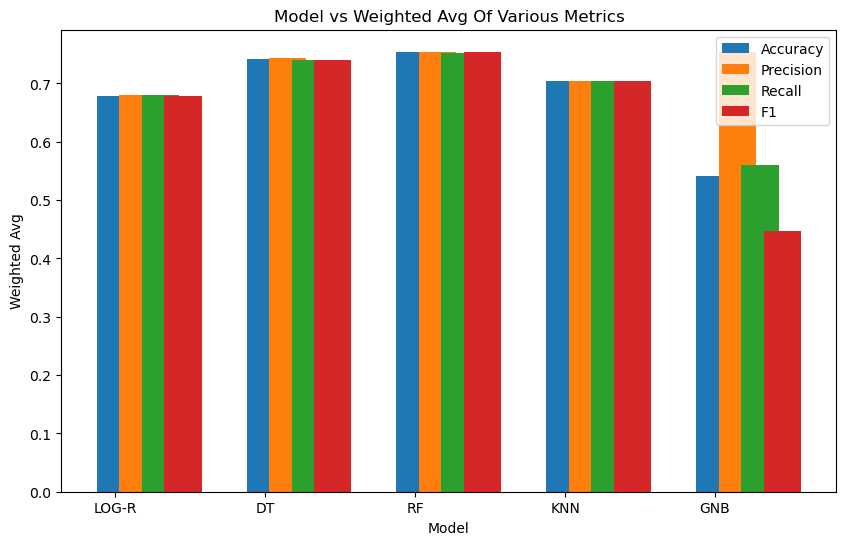

In [117]:
#here we use np.arange to get the number of items to place on the x-axis 
X_axis = np.arange(len(x_label))

#the spacing between each bar each bar
spacing= 0.15

#setting the size of the graph
plt.rcParams["figure.figsize"] = (10,6)
  
#below we are plotting 4 bars for each label on the x-axis with the following syntax
#plt.bar(star_pos_for_each_bar, list_of_values, width_of each_bar, label_name_for each bar)
plt.bar(X_axis, accuracy, 0.25, label = 'Accuracy')
plt.bar(X_axis + spacing, precision, 0.25, label = 'Precision')
plt.bar(X_axis + spacing *2, recall, 0.25, label = 'Recall')
plt.bar(X_axis + spacing *3, f1, 0.25, label = 'F1')

#setting the range of values for the X axis
plt.xticks(X_axis, x_label)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()

In [118]:
#Creating a dataframe with the predictions
y_pred_dt_df = pd.DataFrame(y_pred_dt, columns = [['y_pred']])

#Creating a dataframe with the actual values, the predicted values
comparison_of_true_pred = pd.concat([y_test, y_pred_dt_df], axis = 1)

comparison_of_true_pred.dropna()

Fake(0) or Real(1)  (y_pred,)
8342                 0.0        1.0
7849                 0.0        1.0
4150                 1.0        1.0
1766                 0.0        0.0
6083                 0.0        0.0
...                  ...        ...
3756                 1.0        0.0
5321                 0.0        0.0
5706                 0.0        0.0
2467                 1.0        0.0
6488                 1.0        1.0

[1794 rows x 2 columns]

## Part 4:

In [119]:
fake_news_cleaned['Fake(0) or Real(1)']=0
real_news_cleaned['Fake(0) or Real(1)']=1

In [120]:
news=pd.concat([fake_news_cleaned,real_news_cleaned])

In [121]:
news['new_title'] = news['title_clean'].astype(str) 

In [122]:
news_cleaned_split = news.sample(frac=0.30, random_state=101)
news_cleaned = news.drop(news_cleaned_split.index)  ###fake_news_csv_testing

In [123]:
# fake_news_data1 = fake_news_cleaned['title_clean']
x_train,x_test,y_train,y_test = train_test_split(news_cleaned['new_title'],news_cleaned['Fake(0) or Real(1)'])

In [124]:
print('Training data shape: ', x_train.shape)
print('Testing data shape : ', x_test.shape)

Training data shape:  (16807,)
Testing data shape :  (5603,)


In [125]:
x_train

5931     ['wish', 'racist', 'conserv', 'get', 'happi', ...
12731    ['reform', 'decemb', 'brazil', 'pension', 'wee...
19480    ['new', 'billion', 'hope', 'tax', 'grab', 'mad...
10373    ['nanci', 'rememb', 'reagan', 'funer', 'fierc'...
15903    ['bloat', 'rex', 'democrat', 'tillerson', 'sta...
                               ...                        
14357    ['lie', 'govern', 'hungarian', 'soro', 'say', ...
19877    ['singaporean', 'presidenti', 'protest', 'elec...
5958       ['agre', 'publicli', 'payment', 'wall', 'talk']
4077     ['call', 'campaign', 'manag', 'whiner', 'caugh...
14196    ['watch', 'gop', 'get', 'plan', 'karl', 'call'...
Name: new_title, Length: 16807, dtype: object

### Text Classification

In [126]:
cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,2))
cv_train_reviews=cv.fit_transform(x_train)
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (16807, 75470)
BOW_cv_test: (5603, 75470)


In [127]:
print('Training data shape: ', x_train.shape)
print('Testing data shape : ', x_test.shape)

Training data shape:  (16807,)
Testing data shape :  (5603,)


In [128]:
cv_train_reviews = cv_train_reviews.toarray()
cv_test_reviews = cv_test_reviews.toarray()

### Convert x_train to vector

In [129]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(x_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(x_test)


In [130]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix,roc_curve,auc

### LIME

In [131]:
##Model Matrix
def model_matrix(data_frame_train_y, data_frame_valid_y, object_train, object_valid, model_name):
    print(model_name + ": accuracy on train is:", accuracy_score(data_frame_train_y, object_train))
    print(model_name + ": accuracy on test is:", accuracy_score(data_frame_valid_y, object_valid))
    print(model_name + ": precision_score train is:", precision_score(data_frame_train_y, object_train))
    print(model_name + ": precision_score on test is:", precision_score(data_frame_valid_y, object_valid))
    print(model_name + ": Recall_score on train is:", recall_score(data_frame_train_y, object_train))
    print(model_name + ": Recall_score on test is:", recall_score(data_frame_valid_y, object_valid))
    print(model_name + ": f1_score on train is:", f1_score(data_frame_train_y, object_train))
    print(model_name + ": f1_score on test is:", f1_score(data_frame_valid_y, object_valid))

In [132]:
#### ROC Curve Analysis
def roc_curve_analysis(object_model_name, data_frame_x, data_frame_y):
    object_proba = object_model_name.predict_proba(data_frame_x)[:, 1]
    object_roc = roc_curve(data_frame_y, object_proba)
    return pd.DataFrame(object_roc)

In [133]:
def roc_curve_analysis2(object_model_name, data_frame_x, data_frame_y):
    object_proba = object_model_name.decision_function(data_frame_x)   
    object_roc = roc_curve(data_frame_y, object_proba)
    return pd.DataFrame(object_roc)

In [134]:
## Baseline AUC analysis
def baseline_auc_analysis(data_frame, object_model_prediction, object_model_name):
    fpr, tpr, thresholds = roc_curve(data_frame, object_model_prediction)
    if 'Valid' in object_model_name:
        print(object_model_name + ": ", str(auc(fpr, tpr)), "\n")
    else:
        print(object_model_name + ": ", str(auc(fpr, tpr)))

In [135]:
#### ROC Curve Analysis
def roc_curve_analysis(object_model_name, data_frame_x, data_frame_y):
    object_proba = object_model_name.predict_proba(data_frame_x)[:, 1]
    object_roc = roc_curve(data_frame_y, object_proba)
    return pd.DataFrame(object_roc)

In [136]:
##Roc curve analysis
def roc_cure_analysis_classifier_result(classifier, valid_X, valid_y, random_forest_roc,
                                        gradient_boosting_roc, LinearSVC_roc,PassiveAggressiveClassifier_roc, random_forest_str, gradiant_boosted_str,LinearSVC_str,PassiveAggressiveClassifier_str ):
    result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])
    result_table.head()
    for cls in classifier:
        print(cls)
        
        if(cls==LinearSVC_model):
            y_probability = cls.decision_function(valid_X)
        elif(cls==PassiveAggressiveClassifier_model):
            y_probability = cls.decision_function(valid_X)
        else:
            y_probability = cls.predict_proba(valid_X)[:, 1]
        # plot_roc_curve(cls, valid_X, valid_y)
        fpr, tpr, thresholds = roc_curve(valid_y, y_probability)

        auc = roc_auc_score(valid_y, y_probability)

        result_table = result_table.append({'classifiers': cls,
                                            'fpr': fpr,
                                            'tpr': tpr,
                                            'auc': auc}, ignore_index=True)
    result_table.set_index('classifiers', inplace=True)
    fig = plt.figure(figsize=(8, 6))

    # print(classifier_result_table.head())

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'],
                 result_table.loc[i]['tpr'],
                 label=i)
        # label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    plt.plot(random_forest_roc.loc[0, :], random_forest_roc.loc[1, :], label=random_forest_str)
    plt.plot(gradient_boosting_roc.loc[0, :], gradient_boosting_roc.loc[1, :], label=gradiant_boosted_str)
    plt.plot(LinearSVC_roc.loc[0, :], LinearSVC_roc.loc[1, :], label=LinearSVC_str)
    plt.plot(PassiveAggressiveClassifier_roc.loc[0, :], PassiveAggressiveClassifier_roc.loc[1, :], label=PassiveAggressiveClassifier_str)


    plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size': 8}, loc='lower right')

    plt.show()

### RandomForestClassifier

In [137]:

pipeRF = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())
])

RandomForestClassifier_model = pipeRF.fit(x_train, y_train)
RandomForestClassifier_prediction_train = RandomForestClassifier_model.predict(x_train)
RandomForestClassifier_prediction_test = RandomForestClassifier_model.predict(x_test)
model_matrix(y_train, y_test, RandomForestClassifier_prediction_train, RandomForestClassifier_prediction_test, "Random Forest Classifier")


Random Forest Classifier: accuracy on train is: 1.0
Random Forest Classifier: accuracy on test is: 0.8895234695698733
Random Forest Classifier: precision_score train is: 1.0
Random Forest Classifier: precision_score on test is: 0.890210067380103
Random Forest Classifier: Recall_score on train is: 1.0
Random Forest Classifier: Recall_score on test is: 0.8678516228748068
Random Forest Classifier: f1_score on train is: 1.0
Random Forest Classifier: f1_score on test is: 0.8788886714928584


In [138]:
### LIME

explainer = LimeTextExplainer(class_names=RandomForestClassifier_model.classes_)
exp = explainer.explain_instance(x_test.iloc[20], RandomForestClassifier_model.predict_proba, num_features=10,labels=(1,))
exp.show_in_notebook()

### MultinomialNB

In [139]:
parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
        'tfidf__use_idf': (True, False),
        'clf__alpha': [0.0001, 0.001, 0.01, 1, 10, 100],

    }

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
pipe = Pipeline([
    ('vect', CountVectorizer()),
    #('countvectorizer_debug', Debug()),
    ('tfidf', TfidfTransformer()),
     #('kbest_debug', Debug()),
    ('clf', MultinomialNB(alpha=0))
])

MultinomialNB_model = pipe.fit(x_train, y_train)
MultinomialNB_prediction_train = MultinomialNB_model.predict(x_train)
MultinomialNB_prediction_test = MultinomialNB_model.predict(x_test)
model_matrix(y_train, y_test, MultinomialNB_prediction_train, MultinomialNB_prediction_test, "Multinomial Naïve Bayes")
labels = MultinomialNB_model.predict(x_test)
gs_clf = GridSearchCV(pipe, parameters, n_jobs=-1)   
gs_classifier = gs_clf.fit(x_train, y_train)

Multinomial Naïve Bayes: accuracy on train is: 0.9522817873505087
Multinomial Naïve Bayes: accuracy on test is: 0.8920221310012494
Multinomial Naïve Bayes: precision_score train is: 0.9549537987679672
Multinomial Naïve Bayes: precision_score on test is: 0.8945483485873458
Multinomial Naïve Bayes: Recall_score on train is: 0.9428535225544855
Multinomial Naïve Bayes: Recall_score on test is: 0.8686244204018547
Multinomial Naïve Bayes: f1_score on train is: 0.9488650854373883
Multinomial Naïve Bayes: f1_score on test is: 0.8813958047441678


In [141]:
#model
explainer = LimeTextExplainer(class_names=MultinomialNB_model.classes_)

exp = explainer.explain_instance(x_test.iloc[20], MultinomialNB_model.predict_proba, num_features=10,labels=(1,))
print(exp.available_labels())


[1]


In [142]:
exp.show_in_notebook(text=True)

### Support Vector Machine (SVM)

In [143]:


from sklearn.svm import LinearSVC
pipeSVC = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

LinearSVC_model = pipeSVC.fit(x_train, y_train)
LinearSVC_prediction_train = LinearSVC_model.predict(x_train)
LinearSVC_prediction_test = LinearSVC_model.predict(x_test)
model_matrix(y_train, y_test, LinearSVC_prediction_train, LinearSVC_prediction_test, "Support Vector Machine")



Support Vector Machine: accuracy on train is: 0.9781638602963051
Support Vector Machine: accuracy on test is: 0.9104051401035159
Support Vector Machine: precision_score train is: 0.9759645793801391
Support Vector Machine: precision_score on test is: 0.9002302379125096
Support Vector Machine: Recall_score on train is: 0.9775722250380132
Support Vector Machine: Recall_score on test is: 0.9064914992272025
Support Vector Machine: f1_score on train is: 0.9767677407102615
Support Vector Machine: f1_score on test is: 0.9033500192529843


In [144]:
pipeSVC.named_steps["vect"]

CountVectorizer()

In [145]:
feature_namesSVC = pipeSVC.named_steps["vect"].get_feature_names()

In [146]:
# Get the coefficients of each feature
coefsSVC = pipeSVC.named_steps["clf"].coef_.flatten()

In [147]:
import pandas as pd
# Zip coefficients and names together and make a DataFrame
zipped = zip(feature_namesSVC, coefsSVC)
df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

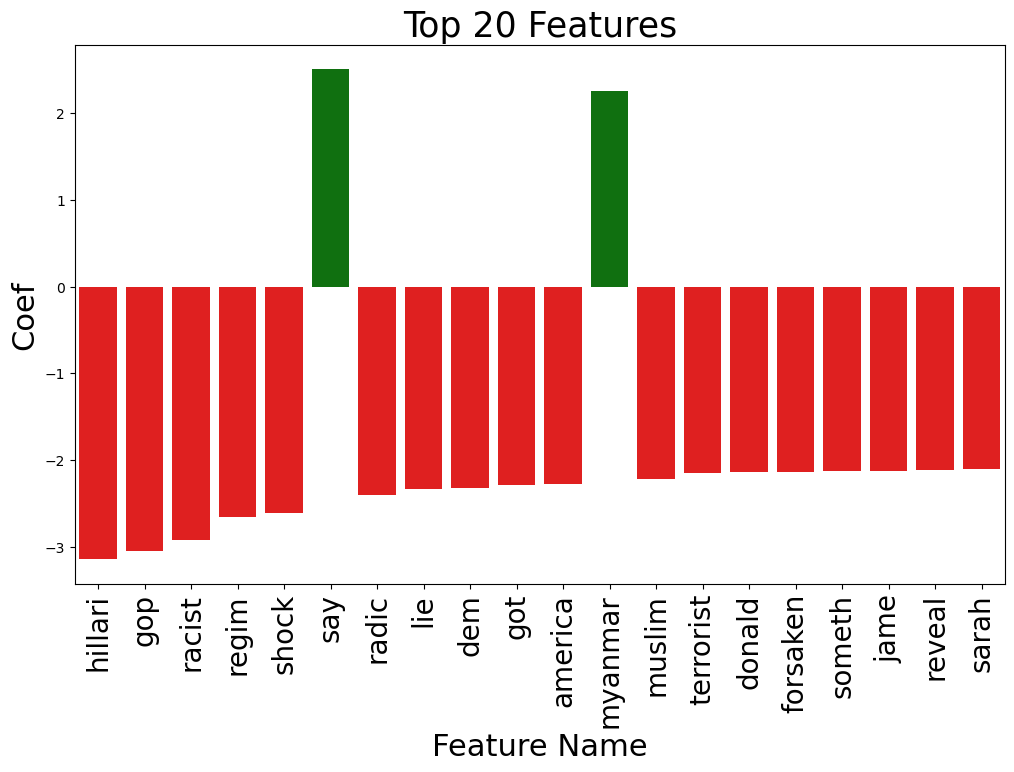

In [148]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

### Passive Aggressive Classifier

In [149]:

from sklearn.linear_model import PassiveAggressiveClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

PassiveAggressiveClassifier_model = pipe.fit(x_train, y_train)
PassiveAggressiveClassifier_prediction_train = PassiveAggressiveClassifier_model.predict(x_train)
PassiveAggressiveClassifier_prediction_test = PassiveAggressiveClassifier_model.predict(x_test)
model_matrix(y_train, y_test, PassiveAggressiveClassifier_prediction_train, PassiveAggressiveClassifier_prediction_test, "Passive Aggressive Classifier")



Passive Aggressive Classifier: accuracy on train is: 0.9975010412328197
Passive Aggressive Classifier: accuracy on test is: 0.8930929859004105
Passive Aggressive Classifier: precision_score train is: 0.9973390775468829
Passive Aggressive Classifier: precision_score on test is: 0.8874172185430463
Passive Aggressive Classifier: Recall_score on train is: 0.9973390775468829
Passive Aggressive Classifier: Recall_score on test is: 0.8802163833075735
Passive Aggressive Classifier: f1_score on train is: 0.9973390775468829
Passive Aggressive Classifier: f1_score on test is: 0.8838021338506306


### Baseline AUC analysis

In [150]:

# RandomForestClassifier
baseline_auc_analysis(y_train, RandomForestClassifier_prediction_train, "RandomForestClassifier Train")
baseline_auc_analysis(y_test, RandomForestClassifier_prediction_test, "RandomForestClassifier Test")

# MultinomialNB
baseline_auc_analysis(y_train, MultinomialNB_prediction_train, "Multinomial Naïve Bayes Train")
baseline_auc_analysis(y_test, MultinomialNB_prediction_test, "Multinomial Naïve Bayes Test")

# Support Vector Machine Train
baseline_auc_analysis(y_train, LinearSVC_prediction_train, "Support Vector Machine Train")
baseline_auc_analysis(y_test, LinearSVC_prediction_test, "Support Vector Machine Test")

# Passive Aggressive Classifier
baseline_auc_analysis(y_train, PassiveAggressiveClassifier_prediction_train, "Passive Aggressive Classifier Train")
baseline_auc_analysis(y_test, PassiveAggressiveClassifier_prediction_test, "Passive Aggressive Classifier Test")


RandomForestClassifier Train:  1.0
RandomForestClassifier Test:  0.8879888296795261
Multinomial Naïve Bayes Train:  0.9517408386748871
Multinomial Naïve Bayes Test:  0.8903652781942938
Support Vector Machine Train:  0.9781299150989282
Support Vector Machine Test:  0.9101280050033193
Passive Aggressive Classifier Train:  0.9974917485322748
Passive Aggressive Classifier Test:  0.8921811601446658


### ROC Curve Analysis

In [151]:

RandomForestClassifier_roc = roc_curve_analysis(RandomForestClassifier_model, x_test, y_test)
MultinomialNB_roc = roc_curve_analysis(MultinomialNB_model, x_test, y_test)
LinearSVC_roc = roc_curve_analysis2(LinearSVC_model, x_test, y_test)
PassiveAggressiveClassifier_roc = roc_curve_analysis2(PassiveAggressiveClassifier_model, x_test, y_test)

### ROC Curve Analysis

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0))])
Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])
Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', PassiveAggressiveClassifier())])


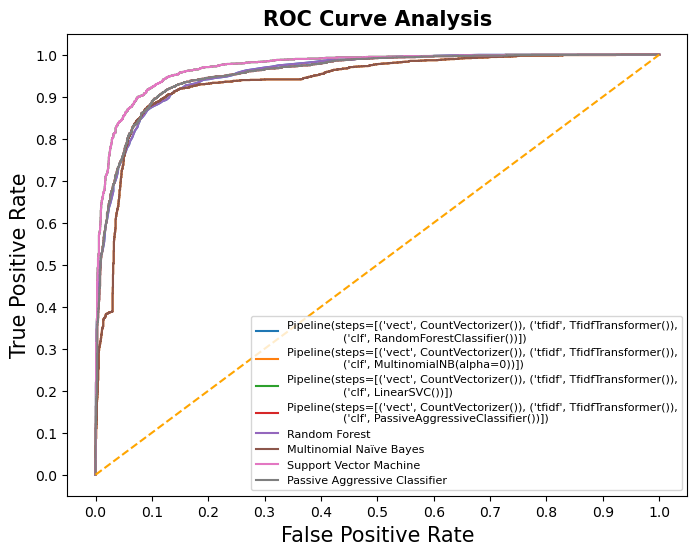

In [152]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# classifier = [RandomForestClassifier_model, MultinomialNB_model, LinearSVC_model,PassiveAggressiveClassifier_model]
classifier = [RandomForestClassifier_model, MultinomialNB_model, LinearSVC_model, PassiveAggressiveClassifier_model]

roc_cure_analysis_classifier_result(classifier, x_test, y_test, RandomForestClassifier_roc, MultinomialNB_roc, LinearSVC_roc, PassiveAggressiveClassifier_roc, "Random Forest","Multinomial Naïve Bayes", "Support Vector Machine","Passive Aggressive Classifier")
